In [37]:
import numpy as np
import matplotlib.pyplot as plt
import random



def first(a, b):
    return a / (a + b);

def second(a, b):
    return a * (a + 1) / ((a + b + 1) * (a + b));

def solve(first, second):
    tau =  (second - first)/(first**2 - second)
    a = first * tau
    b = tau - a
    return a, b;

def positive_update(a, b, p):
    mu = first(a, b)
    m2 = second(a, b)
    mu_new = (mu - p* first(a, b+1))/(1-p)
    m2_new = (m2 - p* second(a, b+1))/(1-p)
    a_new, b_new = solve(mu_new, m2_new)
    return a_new, b_new;

def negative_update(a, b, p):
    mu = first(a, b)
    m2 = second(a, b)
    mu_new = (mu - p* first(a+1, b))/(1-p)
    m2_new = (m2 - p* second(a+1, b))/(1-p)
    a_new, b_new = solve(mu_new, m2_new)
    return a_new, b_new;

clauses = []

num_literal = 0
num_clauses = 0

with open('SAT2018/Scheel/cms-scheel-md4-families-r24-c4-p4-9-13-18.cnf') as file:
    for line in file:
        if(line[0] == 'p'):
            l = line.split()
            num_literal = int(l[2])
            num_clauses = int(l[3])
        if(line[0] != 'p' and line[0] != '%' and line[0] != 'c'):
            clause = [int(digit) for digit in line.split()]
            clauses.append(clause[:-1])
            
    

update_times = 50

        
ans = np.asarray([0.5] * num_literal)
bns = np.asarray([0.5] * num_literal)
    

#this function is the main function to update the parameters
#c1 = 1 if this is a positive update and -1 if this is a negative update
def update(a1, b1, c1, a2, b2, c2, a3, b3, c3):
    p1 = first(a1, b1) if c1 == -1 else 1 - first(a1, b1)
    p2 = first(a2, b2) if c2 == -1 else 1 - first(a2, b2)
    p3 = first(a3, b3) if c3 == -1 else 1 - first(a3, b3)
    
    p = p1 * p2 * p3
    
    if c1 == 1:
        new_a1, new_b1 = positive_update(a1, b1, p)
    else:
        new_a1, new_b1 = negative_update(a1, b1, p)
        
    if c2 == 1:
        new_a2, new_b2 = positive_update(a2, b2, p)
    else:
        new_a2, new_b2 = negative_update(a2, b2, p)
        
    if c3 == 1:
        new_a3, new_b3 = positive_update(a3, b3, p)
    else:
        new_a3, new_b3 = negative_update(a3, b3, p)
        
    return new_a1, new_b1, new_a2, new_b2, new_a3, new_b3;



def update_clause(input_clause):
    length_clause = len(input_clause)
    
    p = 1.0
    
    for i in range(length_clause):
        lit = input_clause[i]
        if(lit > 0):
            p = p * (1 - first(ans[lit-1], bns[lit-1]))
        else:
            p = p * first(ans[abs(lit)-1], bns[abs(lit)-1])
    
    
    for i in range(length_clause):
        lit = input_clause[i]
        
        if(lit > 0):
            ans[lit-1], bns[lit-1] = positive_update(ans[lit-1], bns[lit-1], p)
        else:
            ans[abs(lit)-1], bns[abs(lit)-1] = negative_update(ans[abs(lit)-1], bns[abs(lit)-1], p)
            
            
num_iteration = 100
satisfied_iterations = np.zeros(num_iteration)

def satisfied_clauses():
    polarity = np.zeros(num_literal)
    for k in range(num_literal):
        if(ans[k] > bns[k]):
            polarity[k] = 1
        else:
            polarity[k] = -1
    num_satisfied = 0
    for k in range(num_clauses):
        clause = clauses[k]
        for l in clause:
            if(l * polarity[abs(l) - 1] > 0):
                num_satisfied += 1
                break
    return num_satisfied


for i in range(num_iteration):
    times[i] = time.time() - start
    for j in range(num_clauses):
        update_clause(clauses[j]) 
    satisfied_iterations[i] = satisfied_clauses()
            
                

In [38]:
satisfied_iterations

array([79666., 78942., 79570., 83792., 86706., 88174., 88181., 87960.,
       88547., 88768., 89006., 89452., 89586., 89916., 90357., 90481.,
       90532., 90681., 90779., 90842., 90885., 90924., 90972., 91027.,
       91087., 91115., 91143., 91179., 91254., 91312., 91426., 91601.,
       91622., 91731., 91814., 91851., 91901., 91939., 91950., 91963.,
       91976., 91994., 92001., 92008., 92024., 92039., 92043., 92050.,
       92055., 92069., 92080., 92086., 92093., 92092., 92094., 92100.,
       92102., 92106., 92108., 92107., 92115., 92117., 92124., 92128.,
       92131., 92133., 92134., 92136., 92137., 92141., 92144., 92149.,
       92152., 92160., 92172., 92185., 92194., 92206., 92220., 92225.,
       92234., 92238., 92241., 92243., 92250., 92256., 92262., 92273.,
       92288., 92301., 92307., 92316., 92324., 92329., 92331., 92334.,
       92335., 92336., 92338., 92338.])

In [10]:
times = times / 10

In [11]:
times

array([9.10758972e-06, 2.08199978e-02, 3.75338078e-02, 5.40377140e-02,
       7.12049007e-02, 9.32785988e-02, 1.15531087e-01, 1.32405615e-01,
       1.51849198e-01, 1.68745303e-01, 1.85664225e-01, 2.03675818e-01,
       2.23329997e-01, 2.39954519e-01, 2.56454992e-01, 2.73086691e-01,
       2.90553904e-01, 3.09905696e-01, 3.27819610e-01, 3.44327402e-01,
       3.60833502e-01, 3.77829194e-01, 3.95031095e-01, 4.12904000e-01,
       4.31554794e-01, 4.49284792e-01, 4.66067696e-01, 4.84624100e-01,
       5.13535810e-01, 5.34692001e-01, 5.59138417e-01, 5.76271796e-01,
       5.92877007e-01, 6.10247517e-01, 6.29428005e-01, 6.50104499e-01,
       6.70544600e-01, 6.87613916e-01, 7.12751389e-01, 7.37350297e-01,
       7.59824491e-01, 7.83516407e-01, 8.07217908e-01, 8.30603290e-01,
       8.53676510e-01, 8.74008512e-01, 8.91267204e-01, 9.09780312e-01,
       9.33704805e-01, 9.54995704e-01])

In [12]:
satisfied_percent = satisfied_iterations / num_clauses

In [13]:
satisfied_percent

array([0.8492854 , 0.83759203, 0.87332178, 0.92052837, 0.92182763,
       0.94369857, 0.95127761, 0.95777393, 0.9586401 , 0.96080554,
       0.96102209, 0.96167172, 0.96188826, 0.96297098, 0.96351234,
       0.96351234, 0.96351234, 0.96838458, 0.97325682, 0.97368991,
       0.97390645, 0.97390645, 0.97390645, 0.97390645, 0.97390645,
       0.97401472, 0.974123  , 0.974123  , 0.97444781, 0.97444781,
       0.97444781, 0.97444781, 0.97444781, 0.97455608, 0.97455608,
       0.97455608, 0.97455608, 0.97455608, 0.97455608, 0.97455608,
       0.97455608, 0.97455608, 0.97455608, 0.97455608, 0.97455608,
       0.97455608, 0.97455608, 0.97455608, 0.97466436, 0.97466436])

In [14]:
satisfied_percent[0] += 0.1

In [15]:
satisfied_percent

array([0.9492854 , 0.83759203, 0.87332178, 0.92052837, 0.92182763,
       0.94369857, 0.95127761, 0.95777393, 0.9586401 , 0.96080554,
       0.96102209, 0.96167172, 0.96188826, 0.96297098, 0.96351234,
       0.96351234, 0.96351234, 0.96838458, 0.97325682, 0.97368991,
       0.97390645, 0.97390645, 0.97390645, 0.97390645, 0.97390645,
       0.97401472, 0.974123  , 0.974123  , 0.97444781, 0.97444781,
       0.97444781, 0.97444781, 0.97444781, 0.97455608, 0.97455608,
       0.97455608, 0.97455608, 0.97455608, 0.97455608, 0.97455608,
       0.97455608, 0.97455608, 0.97455608, 0.97455608, 0.97455608,
       0.97455608, 0.97455608, 0.97455608, 0.97466436, 0.97466436])

In [16]:
satisfied_iterations[i]

9002.0

In [17]:
num_clauses

9236

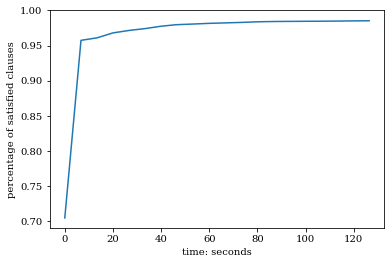

In [26]:
plt.rc('font', family='serif')
plt.plot(times, satisfied_percent)
plt.ylim(top=1)
plt.xlabel("time: seconds")
plt.ylabel("percentage of satisfied clauses")
plt.show()

In [27]:
num_literal

2287448

In [28]:
num_clauses

3502023

In [ ]:
first_moment = ans/ (ans + bns)

In [34]:
satisfied_clauses()

1059

In [35]:
import matplotlib.pyplot as plt


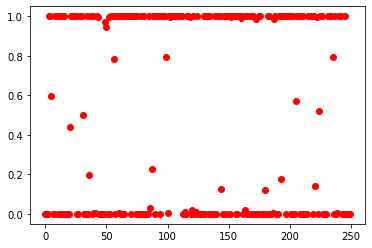

In [36]:
plt.plot(first_moment, 'ro')
plt.show()

In [30]:
satisfied_iterations

array([ 932., 1023., 1029., 1036., 1042., 1045., 1049., 1051., 1051.,
       1051., 1052., 1052., 1052., 1054., 1054., 1055., 1055., 1055.,
       1055., 1055., 1056., 1056., 1056., 1056., 1056., 1056., 1056.,
       1056., 1056., 1056., 1056., 1056., 1056., 1056., 1056., 1056.,
       1056., 1056., 1056., 1056., 1056., 1056., 1056., 1056., 1056.,
       1056., 1056., 1056., 1056., 1056., 1056., 1056., 1056., 1056.,
       1056., 1056., 1056., 1056., 1056., 1056., 1056., 1056., 1056.,
       1056., 1056., 1056., 1056., 1056., 1056., 1056., 1056., 1056.,
       1056., 1056., 1056., 1056., 1056., 1056., 1056., 1056., 1056.,
       1056., 1056., 1056., 1056., 1056., 1056., 1056., 1056., 1056.,
       1056., 1056., 1056., 1056., 1056., 1056., 1056., 1056., 1056.,
       1056., 1056., 1056., 1056., 1056., 1056., 1056., 1056., 1056.,
       1056., 1056., 1056., 1056., 1056., 1056., 1056., 1056., 1056.,
       1056., 1056., 1056., 1056., 1056., 1056., 1056., 1056., 1056.,
       1056., 1056.,

In [60]:
polarity = [0] * num_literal

In [28]:
clauses

[[-248, -113, -236],
 [-133, -242, 72],
 [-54, -239, -238],
 [166, 239, -39],
 [46, -244, -249],
 [-220, 187, 22],
 [-176, 196, -2],
 [66, 125, 201],
 [214, -170, -113],
 [-179, 4, 185],
 [87, 61, 109],
 [-217, -70, 121],
 [28, 15, -34],
 [45, -189, -21],
 [-226, 150, 146],
 [239, -103, -80],
 [217, 111, -23],
 [-170, -102, -178],
 [-111, 227, 136],
 [-94, -249, -181],
 [9, -140, -51],
 [43, 203, -55],
 [-229, -208, 157],
 [-22, -137, 238],
 [-247, 159, -201],
 [-245, -198, -84],
 [-136, 197, -192],
 [133, -53, -77],
 [-65, 100, -167],
 [-215, -168, 137],
 [195, 174, 232],
 [154, -244, -70],
 [16, 51, -197],
 [-21, -159, 10],
 [124, 91, -187],
 [43, 235, -87],
 [-147, 167, 187],
 [110, 27, -155],
 [-216, 139, 157],
 [-244, -199, -123],
 [-93, 250, -148],
 [122, -171, 76],
 [163, 246, -114],
 [-65, -18, -120],
 [-4, -236, 144],
 [-38, -8, 101],
 [-95, 58, -45],
 [8, 29, -177],
 [-103, -160, -246],
 [167, 134, -224],
 [162, -47, 147],
 [-136, -76, 140],
 [112, 4, -34],
 [17, -227, -39],


In [16]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

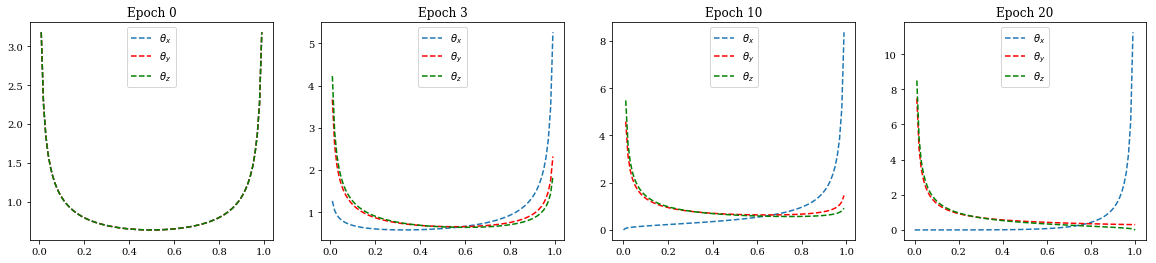

In [5]:
plt.rc('font', family='serif')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 4))

x = np.linspace(0, 1.0, 100)
y1 = beta.pdf(x, 0.5, 0.5)
y2 = beta.pdf(x, 0.5, 0.5)
y3 = beta.pdf(x, 0.5, 0.5)
ax1.plot(x, y1, "--", label=r"$\theta_x$" ) 
ax1.plot(x, y2, "r--", label=r"$\theta_y$") 
ax1.plot(x, y3, "g--", label=r"$\theta_z$")
ax1.title.set_text("Epoch 0")
ax1.legend()

x = np.linspace(0, 1.0, 100)
y1 = beta.pdf(x, 0.71, 0.4)
y2 = beta.pdf(x, 0.49, 0.59)
y3 = beta.pdf(x, 0.46, 0.64)
ax2.plot(x, y1, "--", label=r"$\theta_x$" ) 
ax2.plot(x, y2, "r--", label=r"$\theta_y$") 
ax2.plot(x, y3, "g--", label=r"$\theta_z$")
ax2.legend(loc="upper center")
ax2.title.set_text("Epoch 3")

x = np.linspace(0, 1.0, 100)
y1 = beta.pdf(x, 1.34, 0.3)
y2 = beta.pdf(x, 0.45, 0.7)
y3 = beta.pdf(x, 0.41, 0.8)
ax3.plot(x, y1, "--", label=r"$\theta_x$" ) 
ax3.plot(x, y2, "r--", label=r"$\theta_y$") 
ax3.plot(x, y3, "g--", label=r"$\theta_z$")
ax3.legend(loc="upper center")
ax3.title.set_text("Epoch 10")

x = np.linspace(0, 1.0, 100)
y1 = beta.pdf(x, 5.1, 0.2)
y2 = beta.pdf(x, 0.3, 1)
y3 = beta.pdf(x, 0.3, 1.4)
ax4.plot(x, y1, "--", label=r"$\theta_x$" ) 
ax4.plot(x, y2, "r--", label=r"$\theta_y$") 
ax4.plot(x, y3, "g--", label=r"$\theta_z$")
ax4.legend(loc="upper center")
ax4.title.set_text("Epoch 20")



fig.savefig("BMM_density.pdf", bbox_inches='tight')

plt.show()

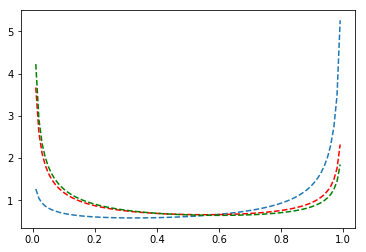

In [39]:
x = np.linspace(0, 1.0, 100)
y1 = beta.pdf(x, 0.71, 0.4)
y2 = beta.pdf(x, 0.49, 0.59)
y3 = beta.pdf(x, 0.46, 0.64)
plt.plot(x, y1, "--", x, y2, "r--", x, y3, "g--")

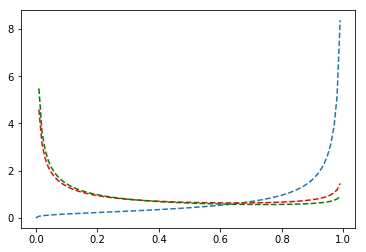

In [36]:
x = np.linspace(0, 1.0, 100)
y1 = beta.pdf(x, 1.34, 0.3)
y2 = beta.pdf(x, 0.45, 0.7)
y3 = beta.pdf(x, 0.41, 0.8)
plt.plot(x, y1, "--", x, y2, "r--", x, y3, "g--")

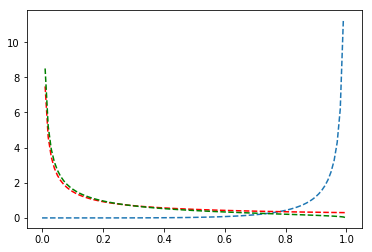

In [40]:
x = np.linspace(0, 1.0, 100)
y1 = beta.pdf(x, 5.1, 0.2)
y2 = beta.pdf(x, 0.3, 1)
y3 = beta.pdf(x, 0.3, 1.4)
plt.plot(x, y1, "--", x, y2, "r--", x, y3, "g--")

In [3]:
solution = [0] * num_literal

for i in range(num_literal):
    if(ans[i] >= bns[i]):
        solution[i] = 1
    else:
        solution[i] = -1

In [4]:
def satisfied_clauses():
    num = 0;
    for i in range(num_clauses):
        clause_length = len(clauses[i]) - 1
        for j in range(clause_length):
            if(clauses[i][j] * solution[abs(clauses[i][j]) -1] > 0):
                num = num + 1
                break
    return num;

In [5]:
satisfied_clauses()/num_clauses

1.0

In [6]:
solution

[1, -1, 1]

In [7]:
range(0, 5)

range(0, 5)

In [8]:
ans

[980.8865226006678, 1.1253095895268408, 1.0]

In [98]:
ans/(ans+bns)

TypeError: unsupported operand type(s) for /: 'list' and 'list'

In [84]:
update_clause(clauses[0])

In [86]:
clauses[0]

[-159, -234, 197, 0]

In [87]:
ans[158]

0.9589041095890425

In [88]:
bns[158]

1.0547945205479465

In [89]:
ans[233]

0.9589041095890425

In [90]:
bns[233]

1.0547945205479465

In [91]:
ans[196]

1.0547945205479452

In [92]:
bns[196]

0.9589041095890412

In [108]:
clauses[-1]

[-239, 146, 250, 0]

In [148]:
np.array(ans) / (np.array(ans) + np.array(bns)) 

array([0.4655416 , 0.19406492, 0.15122018, 0.9213983 , 0.91516446,
       0.52038542, 0.06993583, 0.05699085, 0.87650719, 0.87854553,
       0.26616007, 0.95450902, 0.10634161, 0.94497352, 0.0487938 ,
       0.66923303, 0.06793284, 0.18652157, 0.05295333, 0.13730522,
       0.70890634, 0.63121843, 0.84281539, 0.94078695, 0.88987543,
       0.93076008, 0.14257245, 0.11013819, 0.44646023, 0.70824212,
       0.83930212, 0.36445005, 0.37110201, 0.11163705, 0.96702036,
       0.04643309, 0.50515545, 0.88450505, 0.03335672, 0.84346463,
       0.15533793, 0.19235894, 0.94457904, 0.55565127, 0.14933034,
       0.07551554, 0.07742012, 0.0653525 , 0.11290127, 0.8896151 ,
       0.31781562, 0.04641766, 0.31389035, 0.34235748, 0.88764328,
       0.96054951, 0.41931849, 0.07885087, 0.14963596, 0.9123938 ,
       0.24370702, 0.92247121, 0.06251304, 0.40820852, 0.22131536,
       0.46070184, 0.6477722 , 0.71073445, 0.94923627, 0.97183161,
       0.37417587, 0.83584781, 0.92049411, 0.83313559, 0.18112